**IMPLEMENT KNN ALGORITHM FOR DIABETES CSV DATASET. EVALUATE YOUR MODEL WITH DIFFERENT PARAMATER.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier   # fixed typo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



df=pd.read_csv('/content/diabetes.csv')
df.head()
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


5 ROWS OF DATASET


In [ ]:
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**GRAPH**

<Axes: >

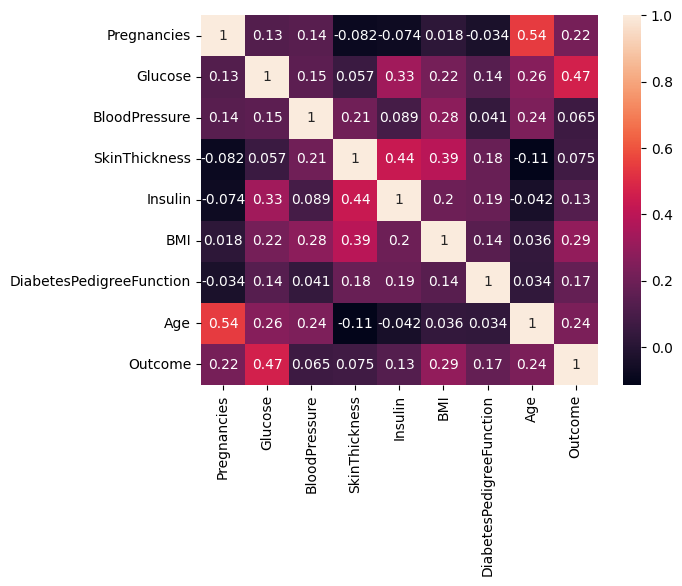

In [ ]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr,annot=True)

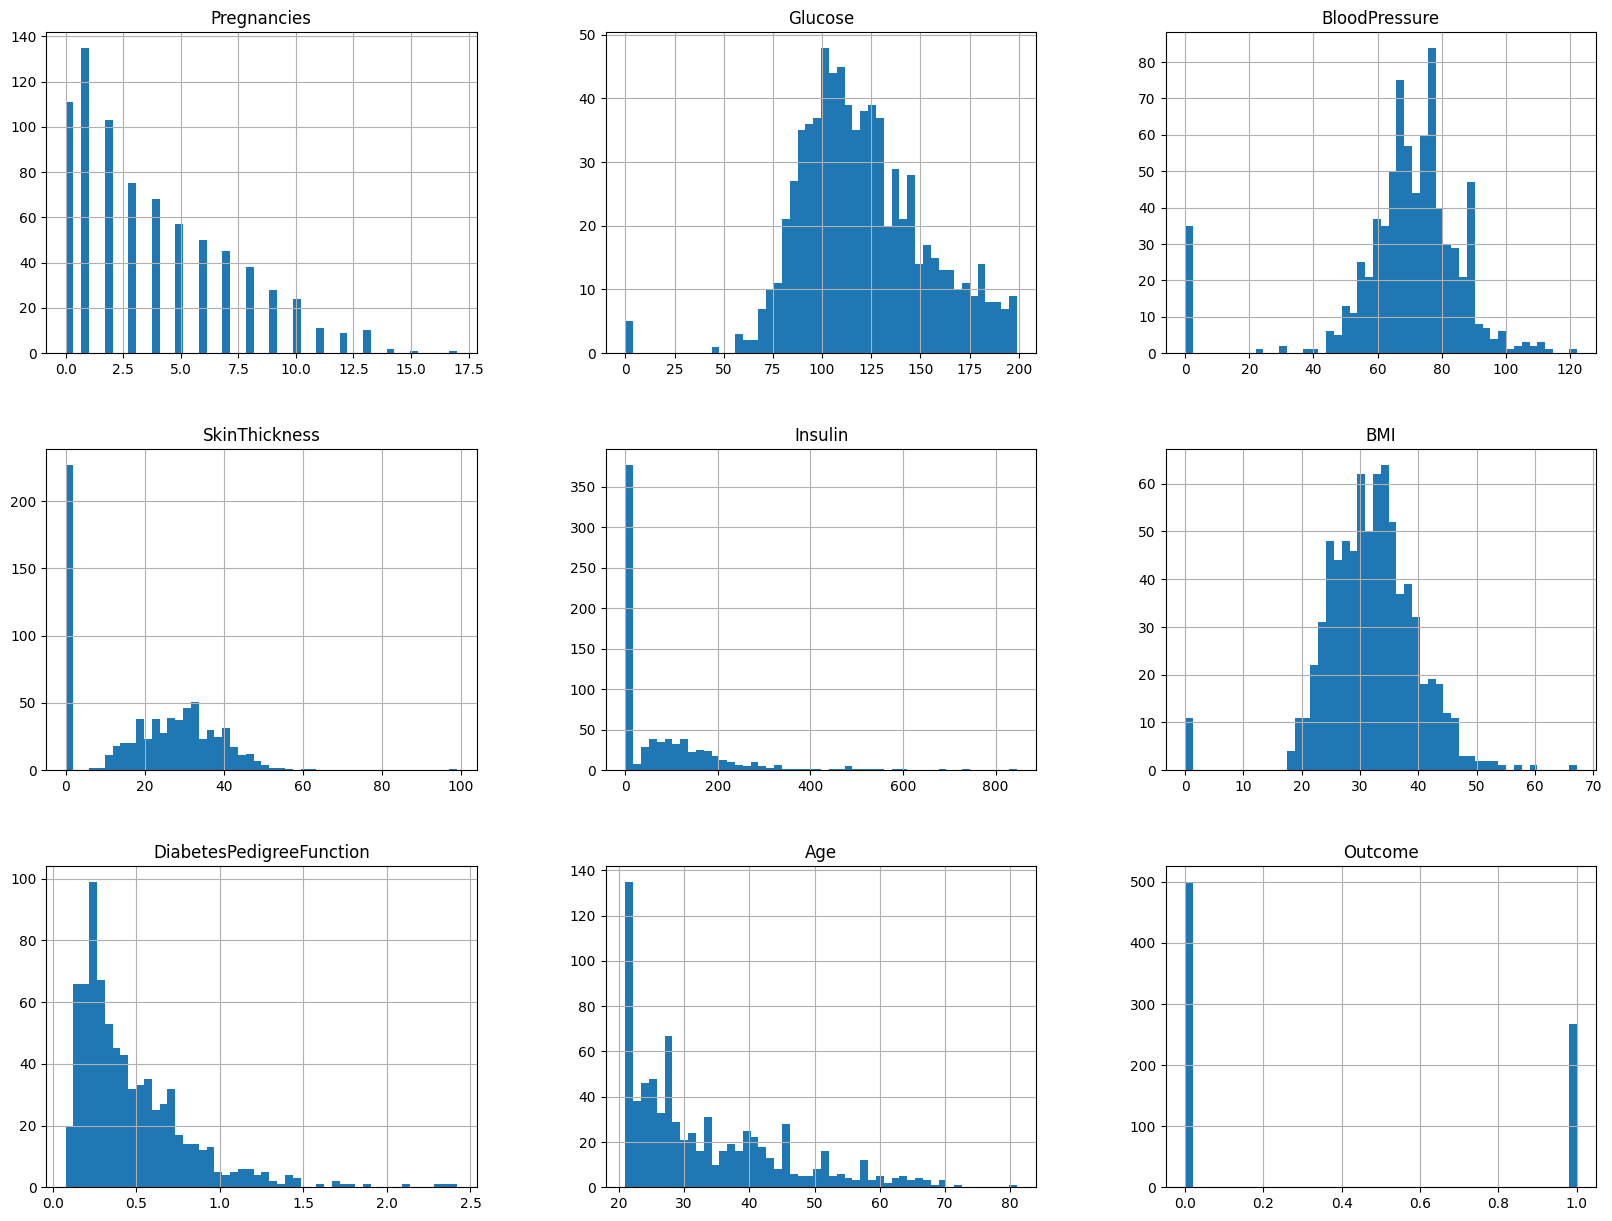

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
bmi_med=df['BMI'].median()
df['BMI']=df['BMI'].replace(to_replace=0,value=bmi_med)

bp_med=df['BloodPressure'].median()
df['BloodPressure']=df['BloodPressure'].replace(to_replace=0,value=bmi_med)

glu_med=df['Glucose'].median()
df['Glucose']=df['Glucose'].replace(to_replace=0,value=glu_med)

skin_med=df['SkinThickness'].median()
df['SkinThickness']=df['SkinThickness'].replace(to_replace=0,value=skin_med)

in_med=df['Insulin'].median()
df['Insulin']=df['Insulin'].replace(to_replace=0,value=in_med)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

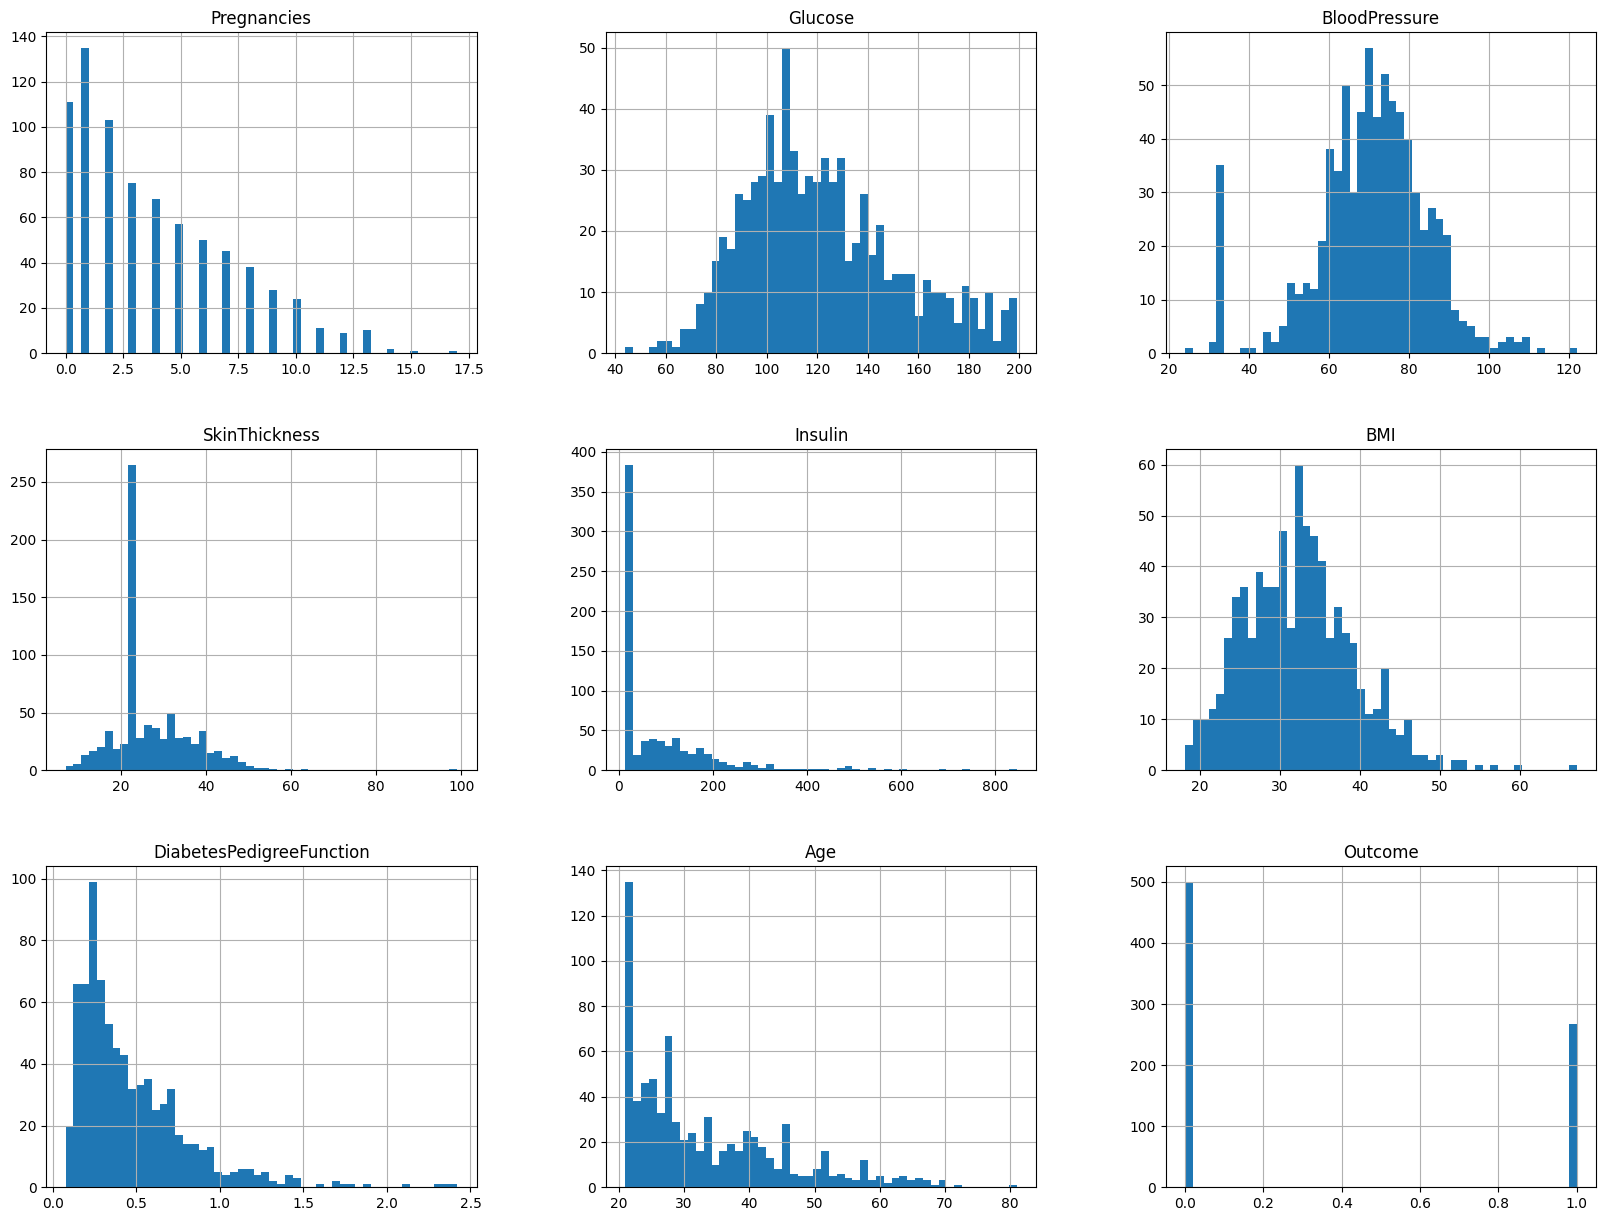

In [ ]:
df.hist(bins=50,figsize=(20,15))

In [ ]:
#CHECK DATASETINFO
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None


In [ ]:
#SEPARATE FEATURES (X) AND TARGET (Y)
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
#SPLIT INTO TRAINING AND TESTING SETS
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
#Standarise the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(X_train,y_train)
#predict
y_pred=knn.predict(X_test)
#Evalute the model
print("\nAccuracy :",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:",confusion_matrix(y_test,y_pred))
print("\nClassification Report:",classification_report(y_test,y_pred))


Accuracy : 0.7272727272727273

Confusion Matrix: [[81 18]
 [24 31]]

Classification Report:               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

